## 0 setup

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.5 MB/s eta 0:00:00


In [ ]:
pip install bert_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=b526cc05cde8205fd30bcd3d6f2710f89432ec97ab5576b3e2bd72a048a24a9d
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [ ]:
# Check GPU
gpu_info = !nvidia-smi
print('\n'.join(gpu_info))

# Check RAM
import psutil
ram_gb = psutil.virtual_memory().total / 1e9
print('\nYour runtime has {:.1f} GB of RAM'.format(ram_gb))


Wed May 28 00:11:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   30C    P0             42W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [ ]:
!pip install -q transformers accelerate auto-gptq optimum

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 120.2 MB/s eta 0:00:00


In [ ]:
## loading the model
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_id = "lmsys/vicuna-7b-v1.5"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=False)

# Load model in FP16
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    device_map="auto",
    trust_remote_code=True
)

tokenizer_config.json:   0%|          | 0.00/749 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/28.1k [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/162 [00:00<?, ?B/s]

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


In [ ]:
import json
import re
import torch
from tqdm import tqdm
import evaluate

# need to run this if directory of the train and test are not find
from google.colab import drive
drive.mount('/content/drive')

# Load metrics
rouge = evaluate.load("rouge")
bertscore = evaluate.load("bertscore")

# -------------------------
# Load data
# -------------------------
def load_docfinqa_subset(json_path, num_samples):
    with open(json_path, "r") as f:
        raw_data = json.load(f)
    return [
        {
            "question": d["Question"],
            "context": d["Context"],
            "answer": d["Answer"]
        }
        for d in raw_data[:num_samples]
    ]

train_data = load_docfinqa_subset("/content/drive/MyDrive/ttic_speech_tech/data/train.json", 10)
test_data = load_docfinqa_subset("/content/drive/MyDrive/ttic_speech_tech/data/test.json", 5)

# -------------------------
# Normalize & Evaluation Helpers
# -------------------------
def normalize(text):
    return re.sub(r'\W+', ' ', text.lower()).strip()

def compute_em_f1(pred, ref):
    pred, ref = normalize(pred), normalize(ref)
    pred_tokens, ref_tokens = pred.split(), ref.split()
    common = set(pred_tokens) & set(ref_tokens)
    if not common:
        return 0.0, 0.0
    precision = len(common) / len(pred_tokens)
    recall = len(common) / len(ref_tokens)
    f1 = 2 * precision * recall / (precision + recall)
    em = float(pred == ref)
    return em, f1

def extract_numerical_answer(text):
    match = re.search(r"(\$?\s?\d+[.,]?\d*\s?(million|billion|%)?)", text, flags=re.IGNORECASE)
    return match.group(1).strip() if match else text.strip()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


KeyboardInterrupt: 

In [ ]:
import torch
import re
import json
from tqdm import tqdm
import evaluate
from sentence_transformers import SentenceTransformer, util

# -------------------------
# Load Evaluation Metrics
# -------------------------
# rouge = evaluate.load("rouge")
# bertscore = evaluate.load("bertscore")

# -------------------------
# Use E5-Base Retriever (recommended for financial domain)
# -------------------------
retriever = SentenceTransformer('intfloat/e5-base-v2')  # Better domain performance


In [ ]:

# -------------------------
# Normalize financial values (e.g., "$10M" = "$10 million")
# -------------------------
def normalize_financial_expression(text):
    text = text.lower().strip()
    text = text.replace(",", "").replace("$", "")
    text = re.sub(r"(\d+)\s?(million|m)", lambda m: str(float(m.group(1)) * 1e6), text)
    text = re.sub(r"(\d+)\s?(billion|b)", lambda m: str(float(m.group(1)) * 1e9), text)
    return text

def extract_numerical_answer(text):
    normalized = normalize_financial_expression(text)
    match = re.search(r"(\d+[.,]?\d*)", normalized)
    return match.group(1).strip() if match else text.strip()

# -------------------------
# Token-based Chunking
# -------------------------
def chunk_text(text, chunk_size=512, overlap=0.2, tokenizer=None):
    assert tokenizer is not None, "Tokenizer must be provided"
    tokens = tokenizer.encode(text, add_special_tokens=False)
    stride = int(chunk_size * (1 - overlap))
    chunks = []
    for i in range(0, len(tokens), stride):
        chunk = tokens[i: i + chunk_size]
        chunk_text = tokenizer.decode(chunk)
        chunks.append(chunk_text)
        if i + chunk_size >= len(tokens):
            break
    return chunks

# -------------------------
# Dense Chunk Retrieval, here we only locate the best chunk, but if the answer span over pages, we might need to look over all the relevant chunks
# -------------------------
def get_top_chunks(question, context, tokenizer, top_k=2, chunk_size = 512):
    chunks = chunk_text(context, chunk_size  = chunk_size, tokenizer=tokenizer)
    q_emb = retriever.encode("query: " + question, convert_to_tensor=True)
    chunk_embs = retriever.encode(["passage: " + ch for ch in chunks], convert_to_tensor=True)
    cos_scores = util.pytorch_cos_sim(q_emb, chunk_embs)[0]
    top_idx = torch.topk(cos_scores, k=top_k).indices
    return [chunks[i] for i in top_idx]

# -------------------------
# Prompt Builder
# -------------------------
def construct_prompt_with_chunks(question, top_chunks):
    context_block = "\n\n".join(top_chunks)
    return f"""Given the financial context below, answer the question concisely. you dont have to do any analysis, here we only want to do data retrival. if its a number or requires numerical computation, compute and show the final results. if the question is asking for a specific piece of information like which year did something happen or which person is the ceo, just return the name.

        Question: {question}

        Context:
        {context_block}

        Answer: """

# -------------------------
# Normalize + EM/F1 Evaluation
# -------------------------
def normalize(text):
    return re.sub(r'\W+', ' ', text.lower()).strip()

def compute_em_f1(pred, ref):
    pred = normalize_financial_expression(pred)
    ref = normalize_financial_expression(ref)
    pred_tokens, ref_tokens = normalize(pred).split(), normalize(ref).split()
    common = set(pred_tokens) & set(ref_tokens)
    if not common:
        return 0.0, 0.0
    precision = len(common) / len(pred_tokens)
    recall = len(common) / len(ref_tokens)
    f1 = 2 * precision * recall / (precision + recall)
    em = float(pred == ref)
    return em, f1


In [ ]:

# -------------------------
# Main Evaluation Loop
# -------------------------
def run_eval_chunked(model, tokenizer, data, top_k=2, chunk_size=512):
    results = []

    for row in tqdm(data):
        # Normalize key casing (handle both "question" and "Question", etc.)
        q = row.get("question") or row.get("Question")
        context = row.get("context") or row.get("Context")
        ref = row.get("answer") or row.get("Answer")
        program = row.get("program") or row.get("Program", "")

        if not q or not context or not ref:
            print("Skipping malformed row:", row)
            continue

        # Step 1: Retrieve top-k chunks
        top_chunks = get_top_chunks(q, context, tokenizer=tokenizer, top_k=top_k, chunk_size=chunk_size)


        # ✅ DEBUG PRINT - show retrieved chunk(s)
        print("=" * 80)
        print("🔎 Question:", q)
        print("📄 Reference Answer:", ref)
        print("📚 Retrieved Top Chunk(s):\n")
        for i, ch in enumerate(top_chunks):
            print(f"[Chunk {i+1}]\n{ch}\n")


        # Step 2: Prompt construction
        prompt = construct_prompt_with_chunks(q, top_chunks)
        qa_inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=1024).to(model.device)

        with torch.no_grad():
            qa_output = model.generate(
                **qa_inputs,
                max_new_tokens=64,
                do_sample=True,
                temperature=0.7,
                top_p=0.9
            )
        decoded = tokenizer.decode(qa_output[0], skip_special_tokens=True)
        pred_raw = decoded.split("[/INST]")[-1].strip() if "[/INST]" in decoded else decoded.strip()
        pred = extract_numerical_answer(pred_raw)

        # Step 3: Evaluate
        em, f1 = compute_em_f1(pred, ref)
        rouge_score = rouge.compute(predictions=[pred], references=[ref])["rougeL"]
        bert_score = bertscore.compute(predictions=[pred], references=[ref], lang="en")["f1"][0]

        results.append({
            "question": q,
            "reference": ref,
            "prediction": pred,
            "program": program,
            "EM": em,
            "F1": f1,
            "ROUGE-L": rouge_score,
            "BERTScore": bert_score
        })

        torch.cuda.empty_cache()

    return results



In [ ]:
results = run_eval_chunked(model, tokenizer, test_data, top_k=3, chunk_size=400)

import pandas as pd
df = pd.DataFrame(results)
display(df[["question", "reference", "prediction", "program", "EM", "F1", "ROUGE-L", "BERTScore"]])


  0%|          | 0/5 [00:00<?, ?it/s]

🔎 Question: what is the net change in net revenue during 2015 for entergy corporation?
📄 Reference Answer: 94
📚 Retrieved Top Chunk(s):

[Chunk 1]
is	primarily	due	to	Entergy	Mississippi's	exit	from	the	System	Agreement	in	November	2015.

The	reserve	equalization	revenue	variance	is	primarily	due	to	the	absence	of	reserve	equalization	revenue	as	compared	to	the	same	period in	2015	resulting	from	Entergy	Mississippi's	exit	from	the	System	Agreement	in	November	2015.

| 2014	net	revenue | $701.2 |
| :--- | :--- |
| Volume/weather | 8.9 |
| Retail\telectric\tprice | 7.3 |
| Net\twholesale\trevenue | (2.7) |
| Transmission\tequalization | (5.4) |
| Reserve\tequalization | (5.5) |
| Other | (7.5) |
| 2015\tnet\trevenue | $696.3 |

The	volume/weather	variance	is	primarily	due	to	an	increase	of	86	GWh,	or	1%,	in	billed	electricity	usage, including	the	effect	of	more	favorable	weather	on	residential	and	commercial	sales.

The	retail	electric	price	variance	is	primarily	due	to	a	$16	million	net

 20%|██        | 1/5 [00:16<01:07, 16.98s/it]

🔎 Question: what percentage of total facilities as measured in square feet are leased?
📄 Reference Answer: 14%
📚 Retrieved Top Chunk(s):

[Chunk 1]
red.	Inventories	at	the	end	of	each	period	were	as	follows:

| (In	Millions) | Dec	26,<br>2015 | Dec	27,<br>2014 |
| :--- | :--- | :--- |
| Raw\tmaterials | $532 | $462 |
| Work\tin\tprocess | 2,893 | 2,375 |
| Finished\tgoods | 1,742 | 1,436 |
| Total\tinventories | $5,167 | $4,273 |

Property,	plant	and	equipment,	net	at	the	end	of	each	period	were	as	follows:

| (In	Millions) | Dec	26,<br>2015 | Dec	27,<br>2014 |
| :--- | :--- | :--- |
| Land\tand\tbuildings | $25,578 | $22,989 |
| Machinery\tand\tequipment | 48,459 | 44,441 |
| Construction\tin\tprogress | 9,359 | 12,279 |
| Total\tproperty,\tplant\tand\tequipment,\tgross | 83,396 | 79,709 |
| Less:\taccumulated\tdepreciation | (51,538) | (46,471) |
| Total\tproperty,\tplant\tand\tequipment,\tnet | $31,858 | $33,238 |

We	compute	depreciation	for	financial	reporting	purposes	using	the	s

 40%|████      | 2/5 [00:23<00:32, 10.88s/it]

🔎 Question: what is the percentage change in cash flow hedges in 2011 compare to the 2010?
📄 Reference Answer: 9.9%
📚 Retrieved Top Chunk(s):

[Chunk 1]
	in	the	fair values	of	derivatives	not	qualifying	for	hedge	accounting	are	reported	in	earnings	as	they	occur.

The	total	notional	amounts	of	derivative	instruments	designated	as	hedging	instruments	as	of	October	29,	2011	and	October	30,	2010	were	$375	million	of	interest	rate	swap	agreements accounted	for	as	fair	value	hedges	and	$153.7	million	and	$139.9	million,	respectively,	of	cash	flow	hedges	denominated	in	Euros,	British	Pounds	and

Philippine	Pesos.	The	fair	values	of	these	hedging	instruments	in	the	Company's	consolidated	balance	sheets	as	of	October	29,	2011	and	October	30,	2010	were	as	follows:

|  | Balance	Sheet	Location | Fair	Value	at<br>October	29,	2011 | Fair	Value	at<br>October	30,	2010 |
| :--- | :--- | :--- | :--- |
| Interest\trate\tswap\tagreements | Other\tassets | $22,187 | $26,801 |
| Forward\tforeign\tcurrency

 60%|██████    | 3/5 [00:29<00:16,  8.48s/it]

🔎 Question: what portion of total purchase price is related to stock awards?
📄 Reference Answer: 2.9%
📚 Retrieved Top Chunk(s):

[Chunk 1]
ically,	no significant	costs	have	been	incurred	related	to	software	warranties	and	no	accruals	for	warranty	costs	have	been	made.

# PART	II

# Item	5.				Market	for	Registrant's	Common	Equity,	Related	Stockholder	Matters	and	Issuer	Purchases	of	Equity	Securities.

Our	common	stock	trades	on	the	New	York	Stock	Exchange	under	the	ticker	symbol	"FIS."	The	table	set	forth	below	provides	the	high	and	low	closing	sales	prices of	the	common	stock	and	the	cash	dividends	declared	per	share	of	common	stock	for	each	quarter	of	2010	and	2009.

On	October	1,	2009,	FIS	completed	the	acquisition	of	Metavante.	As	a	result	of	the	merger,	each	outstanding	share	of	Metavante	common	stock	was	converted	into 1.35	shares	(the	"Exchange	Ratio"),	or	approximately	163.6	million	shares	of	FIS	common	stock.	In	addition,	outstanding	Metavante	stock	options	and	other	stock- ba

 80%|████████  | 4/5 [00:34<00:07,  7.36s/it]

🔎 Question: what was the percentage change in total rental expense under operating leases from july 2 , 2005 to july 1 , 2006?
📄 Reference Answer: 7%
📚 Retrieved Top Chunk(s):

[Chunk 1]
| — | (490,537) | (683,811) |
| Financing\tactivities | (598,631) | (27,923) | (16,791) | (643,345) |
| Exchange\trate\ton\tcash | — | — | (1,601) | (1,601) |
| Intercompany\tactivity | 843,607 | 2,733 | (846,340) | — |
| Net\t(decrease)\tin\tcash | (118,536) | (514) | (18,691) | (137,741) |
| Cash\tat\tthe\tbeginning\tof\tthe\tperiod | 206,043 | 514 | 130,890 | 337,447 |
| Cash\tat\tthe\tend\tof\tthe\tperiod | $87,507 | $— | $112,199 | $199,706 |

# 19. QUARTERLY	RESULTS	(UNAUDITED)

					Financial	information	for	each	quarter	in	the	years	ended	July	1,	2006	and	July	2,	2005	is	set	forth	below:

|  | October	1 | December	31 | April	1 | July	1 | Fiscal	Year |
| :--- | :--- | :--- | :--- | :--- | :--- |
|  |  | (In\tthousands\texcept\tfor\tshare\tdata) | (In\tthousands\texcept\tfor\tshare\tdata) |  |  |

100%|██████████| 5/5 [00:39<00:00,  7.99s/it]


,question,reference,prediction,program,EM,F1,ROUGE-L,BERTScore
0,what is the net change in net revenue during 2...,94,2015,,0.0,0.0,0.0,0.998855
1,what percentage of total facilities as measure...,14%,26,,0.0,0.0,0.0,0.912593
2,what is the percentage change in cash flow hed...,9.9%,2011,,0.0,0.0,0.0,0.875695
3,what portion of total purchase price is relate...,2.9%,5.,,0.0,0.0,0.0,0.911413
4,what was the percentage change in total rental...,7%,2,,0.0,0.0,0.0,0.917197


In [ ]:
## one of the issue we spot is data is spaned over pages.
## question asking how much does the revenue grow from 2014 to 2015 requires knowing revenue in both year.
## however, the number of the two normally span over pages, and doing chunking or such doesn't help as the chunk is normally has a 500 token limit, which doesn't span over pages

## checking running on shorter context

In [ ]:
def load_finqa_data(json_path, num_samples=None):
    with open(json_path, "r") as f:
        raw_data = json.load(f)

    dataset = []
    for item in raw_data[:num_samples] if num_samples else raw_data:
        qa = item["qa"]
        context = f"{item['pre_text']}\n{item['table']}\n{item['post_text']}"
        dataset.append({
            "question": qa["question"],
            "context": context,
            "answer": qa["exe_ans"],
            "program": qa.get("program", "")
        })
    return dataset

test_data = load_finqa_data("/content/drive/MyDrive/ttic_speech_tech/data/fin_qa_test.json", num_samples=10)


def normalize_financial_expression(text):
    text = str(text).lower().strip().replace(",", "").replace("$", "")
    text = re.sub(r"(\d+)\s?(million|m)", lambda m: str(float(m.group(1)) * 1e6), text)
    text = re.sub(r"(\d+)\s?(billion|b)", lambda m: str(float(m.group(1)) * 1e9), text)
    return text


def extract_numerical_values(text):
    normalized = normalize_financial_expression(text)
    return [float(num.replace(",", "")) for num in re.findall(r"\d+[.,]?\d*", normalized)]

def infer_growth(values):
    if len(values) >= 2:
        return values[-1] - values[-2]  # e.g., profit growth from year N-1 to N
    return None


def chunk_text(text, chunk_size=512, overlap=0.2, tokenizer=None):
    tokens = tokenizer.encode(text, add_special_tokens=False)
    stride = int(chunk_size * (1 - overlap))
    chunks = []
    for i in range(0, len(tokens), stride):
        chunk = tokens[i: i + chunk_size]
        chunk_text = tokenizer.decode(chunk)
        chunks.append(chunk_text)
        if i + chunk_size >= len(tokens):
            break
    return chunks

def get_top_chunks(question, context, tokenizer, top_k=2, chunk_size=512):
    chunks = chunk_text(context, chunk_size=chunk_size, tokenizer=tokenizer)

    if len(chunks) == 0:
        print(f"⚠️ No chunks generated for question:\n{question}\n")
        return [context]  # fallback: return full context

    q_emb = retriever.encode("query: " + question, convert_to_tensor=True)
    chunk_embs = retriever.encode(["passage: " + ch for ch in chunks], convert_to_tensor=True)
    cos_scores = util.pytorch_cos_sim(q_emb, chunk_embs)[0]

    actual_top_k = min(top_k, len(chunks))
    top_idx = torch.topk(cos_scores, k=actual_top_k).indices
    selected_chunks = [chunks[i] for i in top_idx]

    # ✅ Print the top retrieved chunks
    print("=" * 80)
    print("🔍 Question:", question)
    print("📦 Top Retrieved Chunk(s):")
    for i, chunk in enumerate(selected_chunks):
        print(f"\n[Chunk {i+1}]:\n{chunk[:1000]}")  # limit to 1000 chars to avoid overflow

    return selected_chunks



def extract_and_format_table(raw_chunks):
    import ast

    table_rows = []
    for chunk in raw_chunks:
        try:
            parsed = ast.literal_eval(chunk) if isinstance(chunk, str) else chunk
            if isinstance(parsed, list) and all(isinstance(row, list) for row in parsed):
                table_rows.extend(parsed)
        except:
            continue

    if not table_rows:
        return "\n\n".join(raw_chunks)  # fallback: return raw chunks

    # Create markdown table
    md = []
    header = ["Index"] + [col for col in table_rows[0][1:]]  # use first row as guide
    md.append("| " + " | ".join(header) + " |")
    md.append("|" + " --- |" * len(header))
    for row in table_rows[1:]:
        md.append("| " + " | ".join(row) + " |")

    return "\n".join(md)

def construct_prompt_with_chunks(question: str, formatted_context_str: str) -> str:
    # Using a Vicuna-friendly instruction format
    prompt = f""" You are a highly specialized financial data analyst. Your sole task is to answer the given QUESTION based *strictly* on the information available in the provided CONTEXT.

Carefully read the QUESTION. Then, thoroughly analyze the CONTEXT. The CONTEXT may consist of text excerpts and data tables (often formatted in Markdown).

**Instructions for Answering:**

1.  **Source Verification**: All parts of your answer MUST come directly from the CONTEXT or be calculated from values explicitly found within the CONTEXT. Do not use any external knowledge or make assumptions beyond the provided data.

2.  **Interpreting Tables**:
    * If the CONTEXT includes tables (e.g., formatted in Markdown with rows and columns, or as list-like structures):
        * Identify the headers or the first row to understand what data each column represents.
        * Locate the relevant row(s) based on keywords from the QUESTION or by matching values in the first column (often acting as row labels).
        * Extract the specific value(s) from the intersecting row(s) and column(s).
    * Pay close attention to units or scaling factors mentioned in table titles, headers, footers, or the first elements of table structures (e.g., "(square feet in millions)", "in thousands", "per share"). Ensure your final numerical answer reflects these units if the question implies it, but do not include the unit text itself in the answer unless it's part of a name.

3.  **Calculations**:
    * If the QUESTION asks for a specific value (e.g., revenue for a specific year, number of facilities), find that value directly in the CONTEXT (text or table).
    * If the QUESTION requires a calculation (e.g., "net change," "difference," "percentage growth," "what portion," "total of X and Y"), identify all necessary numerical values from the CONTEXT and perform the calculation.

4.  **Answer Format**: Your answer should be concise and direct:
    * If the answer is a number, provide *only* the number (e.g., "123.45", "-50", "56.0").
    * If the answer is a name or text, provide *only* that (e.g., "Masco Corporation", "total facilities").
    * Do NOT include explanations, reasoning, units (like $, %, or 'million' unless it's part of a specific name or clearly the only way to represent the answer as per the question's phrasing), or any surrounding conversational text in your final answer. Just the answer itself.

**CONTEXT:**
---
{formatted_context_str}
---

**QUESTION:** {question}

Based strictly on the CONTEXT and following all instructions, what is the answer? Provide only the final value or text.
"""
    return prompt

# def construct_prompt_with_chunks(question, formatted_context_str):
#     # Using a Vicuna-friendly instruction format
#     # This prompt emphasizes using ONLY the provided context and providing a direct answer.
#     prompt = f""" You are a  specialized financial data analyst. Your sole task is to answer the given QUESTION based *strictly* on the anformation available in the provided CONTEXT.

# Carefully read the QUESTION. Then, thoroughly analyze the CONTEXT, which may consist of text excerpts and data tables.

# Instructions for answering:
# 1.  All parts of your answer MUST come directly from the CONTEXT or be calculated from values within the CONTEXT. Do not use any external knowledge.
# 2.  If the QUESTION asks for a specific value (e.g., revenue, number of facilities), find that value in the CONTEXT.
# 3.  If the QUESTION requires a calculation (e.g., "net change," "difference," "percentage growth," "what portion"), identify the relevant numbers from the CONTEXT and perform the calculation.
# 4.  Your answer should be concise:
#     * If the answer is a number, provide *only* the number (e.g., "123.45", "-50").
#     * If the answer is a name or text, provide *only* that (e.g., "Masco").
#     * Do NOT include explanations, units (like $ or %), or any surrounding text unless it's part of the direct answer.

# CONTEXT:
# ---
# {formatted_context_str}
# ---

# QUESTION: {question}

# Based strictly on the CONTEXT and following all instructions, what is the answer? Provide only the final value or text. """
#     return prompt


In [ ]:
def run_eval_chunked(model, tokenizer, data, top_k=2, chunk_size=512):
    results = []

    for row in tqdm(data):
        q = row["question"]
        context = row["context"]
        ref = row["answer"]
        program = row.get("program", "")

        # Step 1: Retrieve top-k chunks
        top_chunks = get_top_chunks(q, context, tokenizer=tokenizer, top_k=top_k, chunk_size=chunk_size)

        # Step 2: Construct prompt
        # prompt = construct_prompt_with_chunks(q, top_chunks)
        # formatted_context = format_chunks_to_markdown(model, tokenizer, top_chunks)
        # formatted_context = extract_and_format_table(top_chunks)

        prompt = construct_prompt_with_chunks(q, top_chunks)

        qa_inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=2048).to(model.device)

        # Step 3: Generate prediction
        with torch.no_grad():
            qa_output = model.generate(
                **qa_inputs,
                max_new_tokens=64,
                do_sample=True,
                temperature=0.7,
                top_p=0.9
            )

        decoded = tokenizer.decode(qa_output[0], skip_special_tokens=True)
        pred_raw = decoded.split("[/INST]")[-1].strip() if "[/INST]" in decoded else decoded.strip()

        # Step 4: Extract numerical answer
        pred_values = extract_numerical_values(pred_raw)
        if "growth" in q.lower() or "change" in q.lower():
            pred = str(infer_growth(pred_values)) if len(pred_values) >= 2 else pred_raw
        else:
            pred = str(pred_values[-1]) if pred_values else pred_raw

        # Step 5: Evaluation
        ref_str = str(ref)
        pred_str = str(pred)

        # Step 5: Evaluation
        em, f1 = compute_em_f1(pred_str, ref_str)
        rouge_score = rouge.compute(predictions=[pred_str], references=[ref_str])["rougeL"]
        bertscore_result = bertscore.compute(predictions=[pred_str], references=[ref_str], lang="en")
        bert_score = bertscore_result["f1"][0]


        results.append({
            "question": q,
            "reference": ref_str,
            "prediction": pred_str,
            "program": program,
            "EM": em,
            "F1": f1,
            "ROUGE-L": rouge_score,
            "BERTScore": bert_score
        })

        torch.cuda.empty_cache()

    return results


In [ ]:
# ✅ Load FinQA-style test data
finqa_test_data = load_finqa_data("/content/drive/MyDrive/ttic_speech_tech/data/fin_qa_test.json", num_samples=5)

# ✅ Run evaluation
results = run_eval_chunked(model, tokenizer, finqa_test_data, top_k=3, chunk_size=400)

import pandas as pd
df = pd.DataFrame(results)
display(df[["question", "reference", "prediction", "program", "EM", "F1", "ROUGE-L", "BERTScore"]])

  0%|          | 0/5 [00:00<?, ?it/s]

🔍 Question: what is the net change in net revenue during 2015 for entergy corporation?
📦 Top Retrieved Chunk(s):

[Chunk 1]:
['entergy corporation and subsidiaries management 2019s financial discussion and analysis a result of the entergy louisiana and entergy gulf states louisiana business combination , results of operations for 2015 also include two items that occurred in october 2015 : 1 ) a deferred tax asset and resulting net increase in tax basis of approximately $ 334 million and 2 ) a regulatory liability of $ 107 million ( $ 66 million net-of-tax ) as a result of customer credits to be realized by electric customers of entergy louisiana , consistent with the terms of the stipulated settlement in the business combination proceeding .', 'see note 2 to the financial statements for further discussion of the business combination and customer credits .', 'results of operations for 2015 also include the sale in december 2015 of the 583 mw rhode island state energy center for a realiz

 20%|██        | 1/5 [00:01<00:04,  1.25s/it]

🔍 Question: what percentage of total facilities as measured in square feet are leased?
📦 Top Retrieved Chunk(s):

[Chunk 1]:
['item 1b .', 'unresolved staff comments not applicable .', 'item 2 .', 'properties as of december 26 , 2015 , our major facilities consisted of : ( square feet in millions ) united states countries total owned facilities1 .', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '30.7 17.2 47.9 leased facilities2 .', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '2.1 6.0 8.1 .']
[['( square feet in mi

 40%|████      | 2/5 [00:02<00:03,  1.01s/it]

🔍 Question: what is the percentage change in cash flow hedges in 2011 compare to the 2010?
📦 Top Retrieved Chunk(s):

[Chunk 1]:
amounts potentially subject to credit risk ( arising from the possible inability of counterparties to meet the terms of their contracts ) are generally limited to the amounts , if any , by which the counterparties 2019 obligations under the contracts exceed the obligations of the company to the counterparties .', 'as a result of the above considerations , the company does not consider the risk of counterparty default to be significant .', 'the company records the fair value of its derivative financial instruments in the consolidated financial statements in other current assets , other assets or accrued liabilities , depending on their net position , regardless of the purpose or intent for holding the derivative contract .', 'changes in the fair value of the derivative financial instruments are either recognized periodically in earnings or in shareholders 2019

 60%|██████    | 3/5 [00:03<00:02,  1.42s/it]

🔍 Question: what portion of total purchase price is related to stock awards?
📦 Top Retrieved Chunk(s):

[Chunk 1]:
avante common stock', '$ 4066.4'], ['value of metavante stock awards', '121.4'], ['total purchase price', '$ 4187.8']]
['we recorded a preliminary allocation of the purchase price to metavante tangible and identifiable intangible assets acquired and liabilities assumed based on their estimated fair values as of october 1 , 2009 .', 'goodwill was fidelity national information services , inc .', 'and subsidiaries notes to consolidated financial statements 2014 ( continued ) %%transmsg*** transmitting job : g26369 pcn : 064000000 ***%%pcmsg|64 |00007|yes|no|03/28/2011 17:32|0|0|page is valid , no graphics -- color : n| .']

[Chunk 2]:
december 31 , 2010 , 2009 and 2008 are included in the consolidated financial statements from and after the date of acquisition .', 'there were no significant acquisitions in 2010 and 2008 .', 'metavante on october 1 , 2009 , we completed the ac

 80%|████████  | 4/5 [00:04<00:01,  1.18s/it]

🔍 Question: what was the difference in percentage cumulative total shareholder return on masco common stock versus the s&p 500 index for the five year period ended 2017?
📦 Top Retrieved Chunk(s):

[Chunk 1]:
['performance graph the table below compares the cumulative total shareholder return on our common stock with the cumulative total return of ( i ) the standard & poor\'s 500 composite stock index ( "s&p 500 index" ) , ( ii ) the standard & poor\'s industrials index ( "s&p industrials index" ) and ( iii ) the standard & poor\'s consumer durables & apparel index ( "s&p consumer durables & apparel index" ) , from december 31 , 2012 through december 31 , 2017 , when the closing price of our common stock was $ 43.94 .', 'the graph assumes investments of $ 100 on december 31 , 2012 in our common stock and in each of the three indices and the reinvestment of dividends .', 'the table below sets forth the value , as of december 31 for each of the years indicated , of a $ 100 investment made

100%|██████████| 5/5 [00:06<00:00,  1.23s/it]


,question,reference,prediction,program,EM,F1,ROUGE-L,BERTScore
0,what is the net change in net revenue during 2...,94.0,2012.0,"subtract(5829, 5735)",0.0,0.5,0.5,0.996260
1,what percentage of total facilities as measure...,0.14464,32.8,"divide(8.1, 56.0)",0.0,0.0,0.0,0.911165
2,what is the percentage change in cash flow hed...,0.09864,-1.0,"subtract(153.7, 139.9), divide(#0, 139.9)",0.0,0.5,0.5,0.874318
3,what portion of total purchase price is relate...,0.02899,121.4,"divide(121.4, 4187.8)",0.0,0.0,0.0,0.882441
4,what was the difference in percentage cumulati...,1.1197,27.68,"subtract(318.46, const_100), divide(#0, const_...",0.0,0.0,0.0,0.921398


## we load a model with more parameters, 13B

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Model ID for 13B with 16k context
model_id_13b = "lmsys/vicuna-13b-v1.5-16k"

# Load tokenizer
tokenizer_13b = AutoTokenizer.from_pretrained(model_id_13b, use_fast=False)

# Load model
model_13b = AutoModelForCausalLM.from_pretrained(
    model_id_13b,
    torch_dtype=torch.float16,
    device_map="auto",
    trust_remote_code=True
)


tokenizer_config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/33.4k [00:00<?, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

pytorch_model-00002-of-00003.bin:   0%|          | 0.00/9.90G [00:00<?, ?B/s]

pytorch_model-00001-of-00003.bin:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

pytorch_model-00003-of-00003.bin:   0%|          | 0.00/6.18G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/35.1k [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


In [ ]:
# ✅ Load FinQA-style test data
finqa_test_data = load_finqa_data("/content/drive/MyDrive/ttic_speech_tech/data/fin_qa_test.json", num_samples=5)

# ✅ Run evaluation
results = run_eval_chunked(model_13b, tokenizer, finqa_test_data, top_k=3, chunk_size=280)

import pandas as pd
df = pd.DataFrame(results)
display(df[["question", "reference", "prediction", "program", "EM", "F1", "ROUGE-L", "BERTScore"]])

NameError: name 'model_13b' is not defined

## moving on exploring the top 1k earning call data

In [ ]:
import json

# Path to original large dataset
original_path = "/content/drive/MyDrive/ttic_speech_tech/data/filtered_predictions.jsonl"


# Step 1: Load top 100 entries
subset = []
with open(original_path, 'r') as f:
    for i, line in enumerate(f):
        if i >= 1000:
            break
        row = json.loads(line)
        # Keep only key fields
        subset.append({
            "question": row.get("question", ""),
            "answer": row.get("answer", ""),
            "transcript": row.get("transcript", ""),
            "date": row.get("date", ""),
            "ticker": row.get("ticker", ""),
            "quarter": row.get("q", ""),
            "predictions": row.get("predictions", [])
        })

# Step 2: Save to a smaller jsonl for development use
subset_path = "/content/drive/MyDrive/ttic_speech_tech/data/lamini_sample_1000.jsonl"
with open(subset_path, 'w') as f:
    for row in subset:
        f.write(json.dumps(row) + "\n")

print(f"Saved top 100 rows to: {subset_path}")


Saved top 100 rows to: /content/drive/MyDrive/ttic_speech_tech/data/lamini_sample_1000.jsonl


In [ ]:
import json

def load_lamini_subset(path, num_samples=100):
    with open(path, "r") as f:
        lines = f.readlines()
    data = [json.loads(line) for line in lines[:num_samples]]
    return data

lamini_data = load_lamini_subset("/content/drive/MyDrive/ttic_speech_tech/data/lamini_sample_1000.jsonl", num_samples=10)


In [ ]:
def construct_prompt(question, transcript):
    return f"""Use the transcript below to answer the question as concisely as possible. If the answer is not found, say 'I do not know. The transcript does not provide' the answers.

Question: {question}

Transcript:
{transcript}

Answer:"""

def extract_answer_from_vicuna_output(decoded, prompt):
    # Remove the prompt from the full decoded string
    answer = decoded.replace(prompt, "").strip()
    return answer

def run_vicuna_inference(question, transcript):
    prompt = construct_prompt(question, transcript)
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=2048).to(model.device)

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=256,
            do_sample=False
        )

    decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
    pred = extract_answer_from_vicuna_output(decoded, prompt)

    return pred


In [ ]:
import re

def normalize(text):
    return re.sub(r'\W+', ' ', text.lower()).strip()

def compute_em_f1(pred, ref):
    pred, ref = normalize(pred), normalize(ref)
    pred_tokens, ref_tokens = pred.split(), ref.split()
    common = set(pred_tokens) & set(ref_tokens)
    if not common:
        return 0.0, 0.0
    precision = len(common) / len(pred_tokens)
    recall = len(common) / len(ref_tokens)
    f1 = 2 * precision * recall / (precision + recall)
    em = float(pred == ref)
    return em, f1

from tqdm import tqdm
import pandas as pd

results = []

for row in tqdm(lamini_data):
    q = row["question"]
    context = row["transcript"]
    ref = row["answer"]

    pred = run_vicuna_inference(q, context)
    em, f1 = compute_em_f1(pred, ref)

    results.append({
        "question": q,
        "reference": ref,
        "prediction": pred,
        "EM": em,
        "F1": f1
    })

df = pd.DataFrame(results)
display(df[["question", "reference", "prediction", "EM", "F1"]])



100%|██████████| 10/10 [00:17<00:00,  1.73s/it]


,question,reference,prediction,EM,F1
0,What was TSMC's revenue in US dollar terms in ...,I do not know. The transcript does not provid...,I do not know. The transcript does not provide...,0.0,0.769231
1,What was TSMC's EPS in 2019,I do not know. The transcript does not provid...,I do not know. The transcript does not provide...,0.0,0.774194
2,What was TSMC's capex spending in 2019,I do not know. The transcript does not provid...,TSMC's capex spending in 2019 was USD 14.9 bil...,0.0,0.428571
3,What is the expected growth rate of global sma...,The expected growth rate of global smartphone...,The expected growth rate of global smartphone ...,0.0,0.888889
4,What is the expected penetration rate for 5G s...,The expected penetration rate for 5G smartpho...,I do not know. The transcript does not provide...,0.0,0.062500
5,What is the expected revenue growth rate for T...,The expected revenue growth rate for TSMC fro...,I do not know. The transcript does not provide...,0.0,0.117647
6,What is TSMC's expected revenue growth rate in...,The expected revenue growth rate for TSMC ove...,TSMC expects its long-term growth outlook to b...,0.0,0.383838
7,What is the expected delivery schedule for cer...,The expected delivery schedule for certain am...,I do not know. The transcript does not provide...,0.0,0.260870
8,What is the expected revenue contribution from...,The expected revenue contribution from N3 in ...,The transcript does not provide information on...,0.0,0.337349
9,What is TSMC's expected revenue growth rate in...,The expected revenue growth rate for TSMC ove...,TSMC expects its long-term growth outlook to b...,0.0,0.383838


In [ ]:
from sentence_transformers import SentenceTransformer, util
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
import re
from tqdm import tqdm
import pandas as pd

# ---------------------------
# Load Vicuna-13B-16K
# ---------------------------
# model_id = "lmsys/vicuna-13b-v1.5-16k"

# tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=False)
# model = AutoModelForCausalLM.from_pretrained(
#     model_id,
#     torch_dtype=torch.float16,
#     device_map="auto",
#     trust_remote_code=True
# )

# ---------------------------
# Load E5 Dense Retriever
# ---------------------------
retriever = SentenceTransformer("intfloat/e5-base-v2")

# ---------------------------
# Chunking + Retrieval
# ---------------------------
def get_top_chunks(question, transcript, tokenizer, top_k=3, chunk_size=512, overlap=0.2):
    tokens = tokenizer.encode(transcript, add_special_tokens=False)
    stride = int(chunk_size * (1 - overlap))
    chunks = [tokenizer.decode(tokens[i:i+chunk_size]) for i in range(0, len(tokens), stride)]

    q_embedding = retriever.encode("query: " + question, convert_to_tensor=True)
    chunk_embeddings = retriever.encode(["passage: " + ch for ch in chunks], convert_to_tensor=True)
    scores = util.pytorch_cos_sim(q_embedding, chunk_embeddings)[0]
    top_indices = torch.topk(scores, k=top_k).indices
    return [chunks[i] for i in top_indices]

# ---------------------------
# Prompt Construction
# ---------------------------
def construct_prompt(question, relevant_chunks):
    context_block = "\n\n".join(relevant_chunks)
    return f"""The following transcript excerpts are relevant to answering a question about a financial report.

Answer the question using only the information in the transcript. If numbers are involved, calculate and show the final value. If the answer is not explicitly stated, provide your best estimate based on available data. but If the answer is not found, say 'I do not know. The transcript does not provide' the answers.

Question: {question}

Transcript:
{context_block}

Answer:"""

# ---------------------------
# Vicuna Inference
# ---------------------------
def run_rag_vicuna_inference(question, transcript):
    top_chunks = get_top_chunks(question, transcript, tokenizer)
    prompt = construct_prompt(question, top_chunks)

    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=2048).to(model.device)
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=512,
            do_sample=False
        )
    decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return decoded.replace(prompt, "").strip()

# ---------------------------
# Normalization + Evaluation
# ---------------------------
def normalize(text):
    return re.sub(r'\W+', ' ', text.lower()).strip()

def compute_em_f1(pred, ref):
    pred, ref = normalize(pred), normalize(ref)
    pred_tokens, ref_tokens = pred.split(), ref.split()
    common = set(pred_tokens) & set(ref_tokens)
    if not common:
        return 0.0, 0.0
    precision = len(common) / len(pred_tokens)
    recall = len(common) / len(ref_tokens)
    f1 = 2 * precision * recall / (precision + recall)
    em = float(pred == ref)
    return em, f1

# ---------------------------
# Inference Loop
# ---------------------------
results = []

for row in tqdm(lamini_data[:100]):  # use top 100 rows
    q = row["question"]
    context = row["transcript"]
    ref = row["answer"]

    pred = run_rag_vicuna_inference(q, context)
    em, f1 = compute_em_f1(pred, ref)

    results.append({
        "question": q,
        "reference": ref,
        "prediction": pred,
        "EM": em,
        "F1": f1
    })

df = pd.DataFrame(results)
display(df[["question", "reference", "prediction", "EM", "F1"]])


100%|██████████| 10/10 [00:11<00:00,  1.15s/it]


,question,reference,prediction,EM,F1
0,What was TSMC's revenue in US dollar terms in ...,I do not know. The transcript does not provid...,I do not know. The transcript does not provide...,0.0,0.484848
1,What was TSMC's EPS in 2019,I do not know. The transcript does not provid...,I do not know. The transcript does not provide...,0.0,0.551724
2,What was TSMC's capex spending in 2019,I do not know. The transcript does not provid...,I do not know. The transcript does not provide...,0.0,0.516129
3,What is the expected growth rate of global sma...,The expected growth rate of global smartphone...,The expected growth rate of global smartphone ...,1.0,1.000000
4,What is the expected penetration rate for 5G s...,The expected penetration rate for 5G smartpho...,The expected penetration rate for 5G smartphon...,0.0,0.823529
5,What is the expected revenue growth rate for T...,The expected revenue growth rate for TSMC fro...,I do not know. The transcript does not provide...,0.0,0.117647
6,What is TSMC's expected revenue growth rate in...,The expected revenue growth rate for TSMC ove...,TSMC expects a long-term revenue growth rate o...,0.0,0.727273
7,What is the expected delivery schedule for cer...,The expected delivery schedule for certain am...,I do not know. The transcript does not provide...,0.0,0.260870
8,What is the expected revenue contribution from...,The expected revenue contribution from N3 in ...,The expected revenue contribution from N3 in t...,0.0,0.385542
9,What is TSMC's expected revenue growth rate in...,The expected revenue growth rate for TSMC ove...,TSMC expects a long-term revenue growth rate o...,0.0,0.727273


## Updated and final version for vicuna 7b

In [ ]:
import torch
import re
import pandas as pd
from tqdm import tqdm
from sentence_transformers import SentenceTransformer, util
from transformers import AutoTokenizer, AutoModelForCausalLM
import evaluate



import json

def load_lamini_subset(path, num_samples=100):
    with open(path, "r") as f:
        lines = f.readlines()
    data = [json.loads(line) for line in lines[:num_samples]]
    return data

lamini_data = load_lamini_subset("/content/drive/MyDrive/ttic_speech_tech/data/lamini_sample_1000.jsonl", num_samples=500)


# Load Vicuna-13B-16k
# model_id = "lmsys/vicuna-13b-v1.5-16k"
# tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=False)
# model = AutoModelForCausalLM.from_pretrained(
#     model_id,
#     torch_dtype=torch.float16,
#     device_map="auto",
#     trust_remote_code=True
# )

# Load retriever
retriever = SentenceTransformer("intfloat/e5-base-v2")
bertscore = evaluate.load("bertscore")



# ---------------------------
# Prompt Construction
# ---------------------------
def construct_prompt(question, relevant_chunks):
    context_block = "\n\n".join(relevant_chunks)
    return f"""The following transcript excerpts are relevant to answering a question about a financial report.

Answer the question using only the information in the transcript. If numbers are involved, calculate and show the final value. If the answer is not explicitly stated, provide your best estimate based on available data. but If the answer is not found, say 'I do not know. The transcript does not provide' the answers.

Question: {question}

Transcript:
{context_block}

Answer:"""

def get_top_chunks(question, transcript, tokenizer, top_k=3, chunk_size=512, overlap=0.2):
    tokens = tokenizer.encode(transcript, add_special_tokens=False)
    stride = int(chunk_size * (1 - overlap))
    chunks = [tokenizer.decode(tokens[i:i+chunk_size]) for i in range(0, len(tokens), stride)]
    q_embedding = retriever.encode("query: " + question, convert_to_tensor=True)
    chunk_embeddings = retriever.encode(["passage: " + ch for ch in chunks], convert_to_tensor=True)
    scores = util.pytorch_cos_sim(q_embedding, chunk_embeddings)[0]
    top_indices = torch.topk(scores, k=top_k).indices
    return [chunks[i] for i in top_indices]

def run_rag_vicuna_inference(question, transcript, tokenizer, model):
    top_chunks = get_top_chunks(question, transcript, tokenizer)
    prompt = construct_prompt(question, top_chunks)
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=2048).to(model.device)
    with torch.no_grad():
        outputs = model.generate(**inputs, max_new_tokens=256, do_sample=False)
    decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return decoded.replace(prompt, "").strip()

In [ ]:
def normalize(text):
    return re.sub(r'\W+', ' ', text.lower()).strip()

def extract_number(text):
    match = re.search(r"(\d+\.?\d*)", text.replace(",", ""))
    return float(match.group(1)) if match else None

def extract_unit(text):
    match = re.search(r"(million|billion|percent|%)", text.lower())
    return match.group(1) if match else ""

def compute_em_f1(pred, ref):
    pred_norm, ref_norm = normalize(pred), normalize(ref)
    pred_tokens, ref_tokens = pred_norm.split(), ref_norm.split()
    common = set(pred_tokens) & set(ref_tokens)
    if not common:
        return 0.0, 0.0
    precision = len(common) / len(pred_tokens)
    recall = len(common) / len(ref_tokens)
    f1 = 2 * precision * recall / (precision + recall)
    em = float(pred_norm == ref_norm)
    return em, f1

def compute_bert_score(pred, ref):
    return bertscore.compute(predictions=[pred], references=[ref], lang="en")["f1"][0]

def numerical_match(pred, ref, tolerance=0.01):
    num_pred = extract_number(pred)
    num_ref = extract_number(ref)
    if num_pred is None or num_ref is None:
        return 0.0
    return float(abs(num_pred - num_ref) / (abs(num_ref) + 1e-6) < tolerance)

def unit_match(pred, ref):
    return float(extract_unit(pred) == extract_unit(ref))

def binary_accuracy(pred, ref):
    return float("i do not know" in normalize(pred) and "i do not know" in normalize(ref))


In [ ]:
def evaluate_lamini_dataset(data, tokenizer, model):
    results = []
    for row in tqdm(data):
        q = row["question"]
        context = row["transcript"]
        ref = row["answer"]

        pred = run_rag_vicuna_inference(q, context, tokenizer, model)
        em, f1 = compute_em_f1(pred, ref)
        bscore = compute_bert_score(pred, ref)
        num_match = numerical_match(pred, ref)
        u_match = unit_match(pred, ref)
        bin_acc = binary_accuracy(pred, ref)

        results.append({
            "question": q,
            "reference": ref,
            "prediction": pred,
            "EM": em,
            "F1": f1,
            "BERTScore": bscore,
            "Numerical_EM": num_match,
            "Unit_Match": u_match,
            "Binary_Acc": bin_acc
        })
    return pd.DataFrame(results)

results_df_7b = evaluate_lamini_dataset(lamini_data[:1000], tokenizer, model)
# Show key metrics
display(results_df_7b[["question", "reference", "prediction", "EM", "F1", "BERTScore", "Numerical_EM", "Unit_Match", "Binary_Acc"]])


  0%|          | 0/500 [00:00<?, ?it/s]The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
 45%|████▌     | 225/500 [06:46<08:16,  1.80s/it]


RuntimeError: selected index k out of range

In [ ]:
import torch
import re
import pandas as pd
from tqdm import tqdm
from sentence_transformers import SentenceTransformer, util
from transformers import AutoTokenizer, AutoModelForCausalLM
import evaluate



import json

def load_lamini_subset(path, num_samples=100):
    with open(path, "r") as f:
        lines = f.readlines()
    data = [json.loads(line) for line in lines[:num_samples]]
    return data

lamini_data = load_lamini_subset("/content/drive/MyDrive/ttic_speech_tech/data/lamini_sample_1000.jsonl", num_samples=500)


# Load Vicuna-13B-16k
model_id = "lmsys/vicuna-13b-v1.5"

tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=False)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    device_map="auto",
    trust_remote_code=True
)

# Load retriever
retriever = SentenceTransformer("intfloat/e5-base-v2")
bertscore = evaluate.load("bertscore")


# ---------------------------
# Prompt Construction
# ---------------------------
def construct_prompt(question, relevant_chunks):
    context_block = "\n\n".join(relevant_chunks)
    return f"""The following transcript excerpts are relevant to answering a question about a financial report.

Answer the question using only the information in the transcript. If numbers are involved, calculate and show the final value. If the answer is not explicitly stated, provide your best estimate based on available data. but If the answer is not found, say 'I do not know. The transcript does not provide' the answers.

Question: {question}

Transcript:
{context_block}

Answer:"""

def get_top_chunks(question, transcript, tokenizer, top_k=3, chunk_size=800, overlap=0.2):
    tokens = tokenizer.encode(transcript, add_special_tokens=False)
    stride = int(chunk_size * (1 - overlap))
    chunks = [tokenizer.decode(tokens[i:i+chunk_size]) for i in range(0, len(tokens), stride)]
    q_embedding = retriever.encode("query: " + question, convert_to_tensor=True)
    chunk_embeddings = retriever.encode(["passage: " + ch for ch in chunks], convert_to_tensor=True)
    scores = util.pytorch_cos_sim(q_embedding, chunk_embeddings)[0]
    top_indices = torch.topk(scores, k=top_k).indices
    return [chunks[i] for i in top_indices]

def run_rag_vicuna_inference(question, transcript, tokenizer, model):
    top_chunks = get_top_chunks(question, transcript, tokenizer)
    prompt = construct_prompt(question, top_chunks)
    inputs = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=4096).to(model.device)
    with torch.no_grad():
        outputs = model.generate(**inputs, max_new_tokens=512, do_sample=False)
    decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return decoded.replace(prompt, "").strip()

In [ ]:
def evaluate_lamini_dataset(data, tokenizer, model):
    results = []
    for row in tqdm(data):
        q = row["question"]
        context = row["transcript"]
        ref = row["answer"]

        pred = run_rag_vicuna_inference(q, context, tokenizer, model)
        em, f1 = compute_em_f1(pred, ref)
        bscore = compute_bert_score(pred, ref)
        num_match = numerical_match(pred, ref)
        u_match = unit_match(pred, ref)
        bin_acc = binary_accuracy(pred, ref)

        results.append({
            "question": q,
            "reference": ref,
            "prediction": pred,
            "EM": em,
            "F1": f1,
            "BERTScore": bscore,
            "Numerical_EM": num_match,
            "Unit_Match": u_match,
            "Binary_Acc": bin_acc
        })
    return pd.DataFrame(results)

results_df_13b = evaluate_lamini_dataset(lamini_data[:1000], tokenizer, model)
# Show key metrics
display(results_df_13b[["question", "reference", "prediction", "EM", "F1", "BERTScore", "Numerical_EM", "Unit_Match", "Binary_Acc"]])


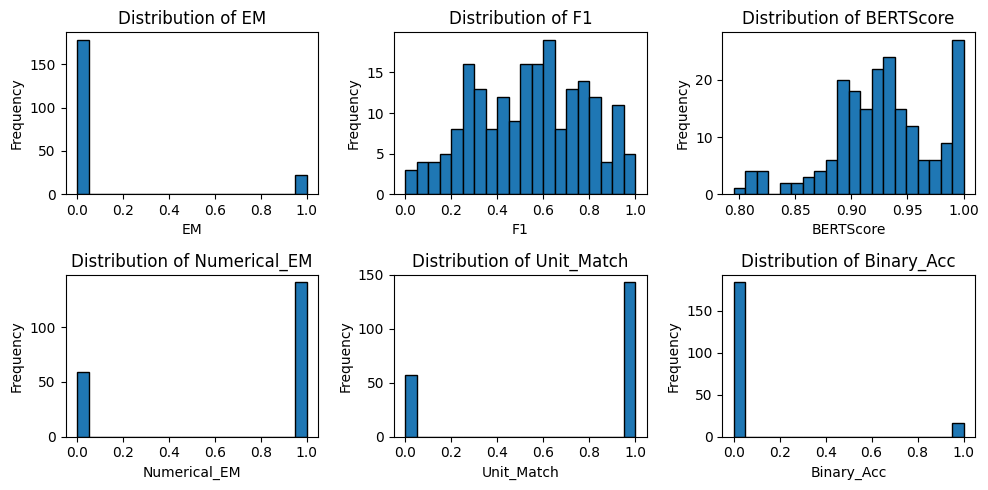

In [6]:
# plot_metrics.py

import argparse
import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(csv_path, bins=20):
    """
    Load the evaluation CSV and plot all histograms on a 3x2 layout.
    Saves the combined plot as 'metrics_histograms.png'.
    """
    # 1. Load data
    df = pd.read_csv(csv_path)

    # 2. Specify your metrics
    metrics = [
        'EM',
        'F1',
        'BERTScore',
        'Numerical_EM',
        'Unit_Match',
        'Binary_Acc',
    ]

    # 3. Create 3x2 subplot layout
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
    axes = axes.flatten()

    for ax, metric in zip(axes, metrics):
        if metric not in df.columns:
            print(f"⚠️ Column '{metric}' not found in CSV, skipping.")
            ax.axis('off')  # hide empty subplot
            continue

        # Plot histogram
        ax.hist(df[metric].dropna(), bins=bins, edgecolor='black')
        ax.set_title(f'Distribution of {metric}')
        ax.set_xlabel(metric)
        ax.set_ylabel('Frequency')

    # If any extra subplots, hide them
    for extra_ax in axes[len(metrics):]:
        extra_ax.axis('off')

    plt.tight_layout()
    plt.savefig('metrics_histograms.png')
    plt.show()


plot_histograms("results/results_vicuna_7b_eval.csv", bins=20)